In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("netflix_titles.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [2]:
print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

How many movies and TV shows avialbale on Netflix

In [3]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Movie = 6131 ,
TV Show = 2676

Which country has added the most content to Netflix ?


In [4]:
print(df['country'].value_counts())

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64


What are the top 10 most common genres on Netflix?

In [22]:
df['listed_in'] = df['listed_in'].str.split(",")
df = df.explode("listed_in")
print(f"The top 10 most common genres on Netflix are {df['listed_in'].str.strip().value_counts().head(10)}")


The top 10 most common genres on Netflix are listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


How many titles were added to Netflix each year based on the date_added column?

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], errors ='coerce')
df['year_added'] = df["date_added"].dt.year
print(f"{df["year_added"].value_counts().sort_index()} titles were added to Netflix each year based on the date_added column")

How many titles were released each year?

In [9]:
print(df['release_year'].value_counts().sort_index())

release_year
1925       1
1942       4
1943       4
1944       6
1945       7
        ... 
2017    2161
2018    2513
2019    2252
2020    2086
2021    1299
Name: count, Length: 74, dtype: int64


Which rating (TV-MA, PG-13, R, etc.) is most common on Netflix?

In [29]:
print(f"The most comman rating on netflix is( {df['rating'].str.split(',').explode().str.strip().value_counts().head(1)})")

The most comman rating on netflix is( rating
TV-MA    7310
Name: count, dtype: int64)


What is the average duration of movies available on Netflix?

In [14]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_time'] = movies["duration"].str.replace(" min", "", regex=False).dropna().astype(int)
print(f"The average duration of movies available on Netflix is {movies['duration_time'].mean()} min")

The average duration of movies available on Netflix is 99.57718668407311 min


Which director has the highest number of titles on Netflix?

In [32]:
print(df["director"].dropna().str.split(",").explode().str.strip().value_counts().head(1))

director
Cathy Garcia-Molina    37
Name: count, dtype: int64


How many titles were added to Netflix each year based on the date_added column? explain the concept

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()
print(titles_per_year)


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


What percentage of Netflix content is Movies versus TV Shows?

total movies =  6131
total show =  2676
total_content = 8807
movies are 69.61507891449983%
movies are 69.61507891449983%


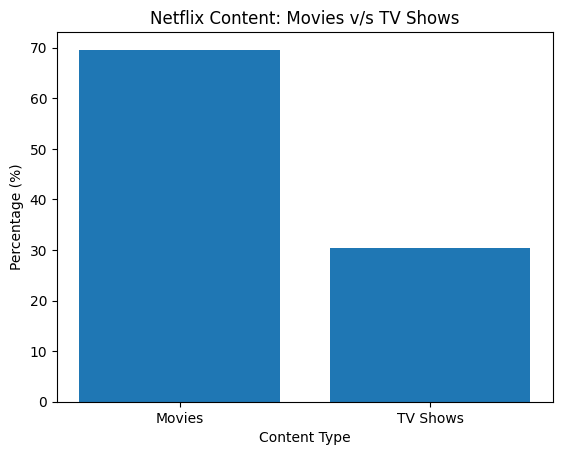

In [23]:
total_movies = df[df['type'] == 'Movie'].shape[0]
print("total movies = " ,total_movies)
total_TV_Shows = df[df["type"] == 'TV Show'].shape[0]
print("total show = " , total_TV_Shows) 

print(f"total_content = {total_movies + total_TV_Shows}")

def movie_versus_tv_shows(total_movie, total_tv_shows, total_content):
    movie_percentage = (total_movie/total_content)*100
    tv_shows_percentage = (total_tv_shows/total_content)*100
    if(movie_percentage > tv_shows_percentage):
        print(f"movies are {movie_percentage}%")
    else:
        print(f"tv shows are {tv_shows_percentage}% more than movies")    

    return movie_percentage,tv_shows_percentage    

movie_percentage, tv_shows_percentage = movie_versus_tv_shows(total_movies, total_TV_Shows, total_content)

movie_versus_tv_shows(total_movies, total_TV_Shows, total_movies + total_TV_Shows)     

labels = ['Movies', 'TV Shows']
percentages = [movie_percentage, tv_shows_percentage]

plt.figure()
plt.bar(labels, percentages)
plt.xlabel("Content Type")
plt.ylabel("Percentage (%)")
plt.title("Netflix Content: Movies v/s TV Shows")
plt.show()


Which actors appear most frequently across Netflix titles ?

In [29]:
df["cast"].str.split(",").explode().str.strip().value_counts()

cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
                     ..
Tejashree Pradhan     1
Neha Joshi            1
Ayesha Omer           1
Samina Peerzada       1
Waseem Abbas          1
Name: count, Length: 36439, dtype: int64